In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupShuffleSplit # ensures don't mix series
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/processed/cleaned_data.csv")

df.head()

,Series,Contestant,score_ep1,ppt_ep1,score_ep2,ppt_ep2,final_pct_points
0,1,Frank Skinner,19,3.8,28,2.8,0.2133
1,1,Josh Widdicombe,13,2.6,29,2.9,0.2156
2,1,Roisin Conaty,7,1.4,28,2.8,0.1560
3,1,Romesh Ranganathan,19,3.8,33,3.3,0.2133
4,1,Tim Key,17,3.4,35,3.5,0.2018


In [2]:
features = ["score_ep1", "ppt_ep1"] 
target = "final_pct_points"
groups = df["Series"] 

In [3]:
# Create a Group shuffle split object using library imported above

gss = GroupShuffleSplit(
    n_splits=1,
    test_size=0.2,  
    random_state=42
)


train_idx, test_idx = next(
    gss.split(df[features], df[target], groups))


X_train = df.loc[train_idx, features]

X_test = df.loc[test_idx, features]

y_train = df.loc[train_idx, target]

y_test = df.loc[test_idx, target]

In [4]:
# Calculate the baseline prediction.

baseline_prediction = y_train.mean()

y_pred_baseline = np.full_like(y_test, baseline_prediction)

# Calculate the Mean Absolute Error (MAE) of the baseline model.
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

# Calculate the Root Mean Squared Error of the baseline model.
rmse_baseline = mean_squared_error(
    y_test,
    y_pred_baseline,
    squared=False)

mae_baseline_format = (mae_baseline * 100).round(1).astype(str) + "%"
rmse_baseline_format = (rmse_baseline * 100).round(1).astype(str) + "%"

print(f"Baseline MAE: {mae_baseline:.3f}")
print(f"Baseline RMSE: {rmse_baseline:.3f}")


Baseline MAE: 0.015
Baseline RMSE: 0.018


In [5]:
# Create a new linear regression model 
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [6]:
# using the TEST explanatory variables, use the model to estimate the outcome for each contestant (in y_pred)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression MAE: {mae:.3f}")

print(f"\nLinear Regression RMSE: {rmse:.3f}")


Linear Regression MAE: 0.011

Linear Regression RMSE: 0.014


In [16]:
plot_df = df.loc[test_idx, [
    "Contestant",
    "Series",
    target
]].copy()

plot_df["actual"] = y_test.values
plot_df["predicted"] = y_pred

plot_df = plot_df.drop(['final_pct_points'], axis=1)

plot_df = plot_df.sort_values(
    by=["Series", "actual"],
    ascending=[True, True])

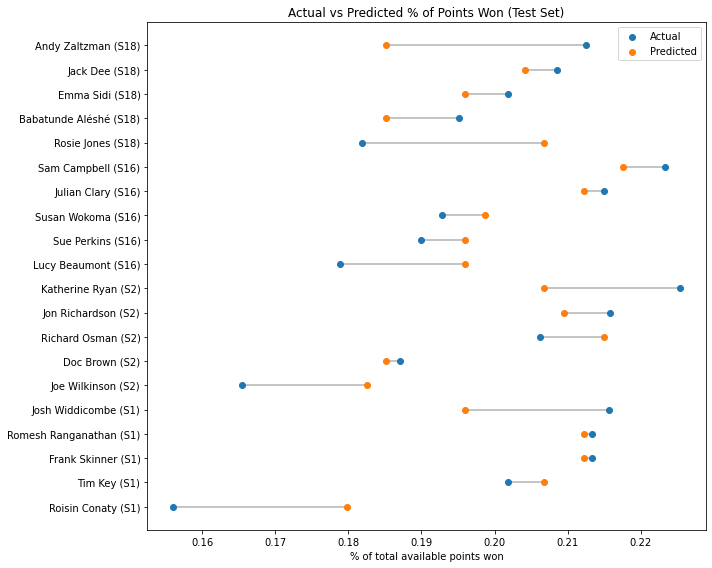

In [19]:
# Set up x axis position

y_pos = np.arange(len(plot_df))

plt.figure(figsize=(10, 0.4 * len(plot_df)))

# Lines
plt.hlines(
    y=y_pos,
    xmin=plot_df["actual"],
    xmax=plot_df["predicted"],
    color="grey",
    alpha=0.6
)

# Actual values
plt.scatter(
    plot_df["actual"],
    y_pos,
    label="Actual",
    zorder=3
)

# Predicted values
plt.scatter(
    plot_df["predicted"],
    y_pos,
    label="Predicted",
    zorder=3
)

# Y-axis labels
plt.yticks(
    y_pos,
    plot_df["Contestant"] + " (S" + plot_df["Series"].astype(str) + ")"
)

plt.xlabel("% of total available points won")
plt.title("Actual vs Predicted % of Points Won (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()